#  Important Libraries

In [1]:
import tensorflow as tf
import glob, os
import cv2
import pandas
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Loading Data

In [2]:
val_dir = '/kaggle/input/val-for-evaluate/val1'

In [3]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
batch = 32
image_w = 224
image_h = 128 
validation_set = val_datagen.flow_from_directory(val_dir,
                                             target_size=(image_w, image_h),
                                             batch_size = batch,
                                             color_mode = 'rgb',
                                             class_mode = 'categorical')

Found 17786 images belonging to 3 classes.


In [5]:
class_dict = validation_set.classes.tolist()

# Model Loading

In [7]:
model = tf.keras.models.load_model('/kaggle/input/model-file/cnn_model.h5')

2023-02-17 03:26:29.894238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-17 03:26:29.894305: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


# Model Testing

In [8]:
score = model.evaluate(validation_set)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

556/556 [==============================] - 118s 211ms/step - loss: 0.5940 - accuracy: 0.7226
Accuracy for test images: 72.265 %


In [10]:
y_pred = model.predict(validation_set)

556/556 [==============================] - 95s 170ms/step


In [15]:
predict_value = []
for pred in y_pred:
    pred = np.argmax(pred)
    predict_value.append(pred)

In [20]:
y_true = validation_set.classes.tolist()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_true, predict_value)*100,'%')
print('Precision Macro Score ',precision_score(y_true, predict_value,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_true, predict_value, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_true, predict_value, average = 'macro')*100,'%')

Accuracy Score 33.301473068705725 %
Precision Macro Score  32.31381109633829 %
Recall_Score 32.360564593321996 %
F1_Score 32.09025006089733 %


In [25]:
classes = sorted(os.listdir(val_dir))

# Model Testing with Confusion Matrix

In [35]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    #y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (14, 10))
    #plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    plt.savefig('confusion_matrix', transparent=True, dpi=500)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

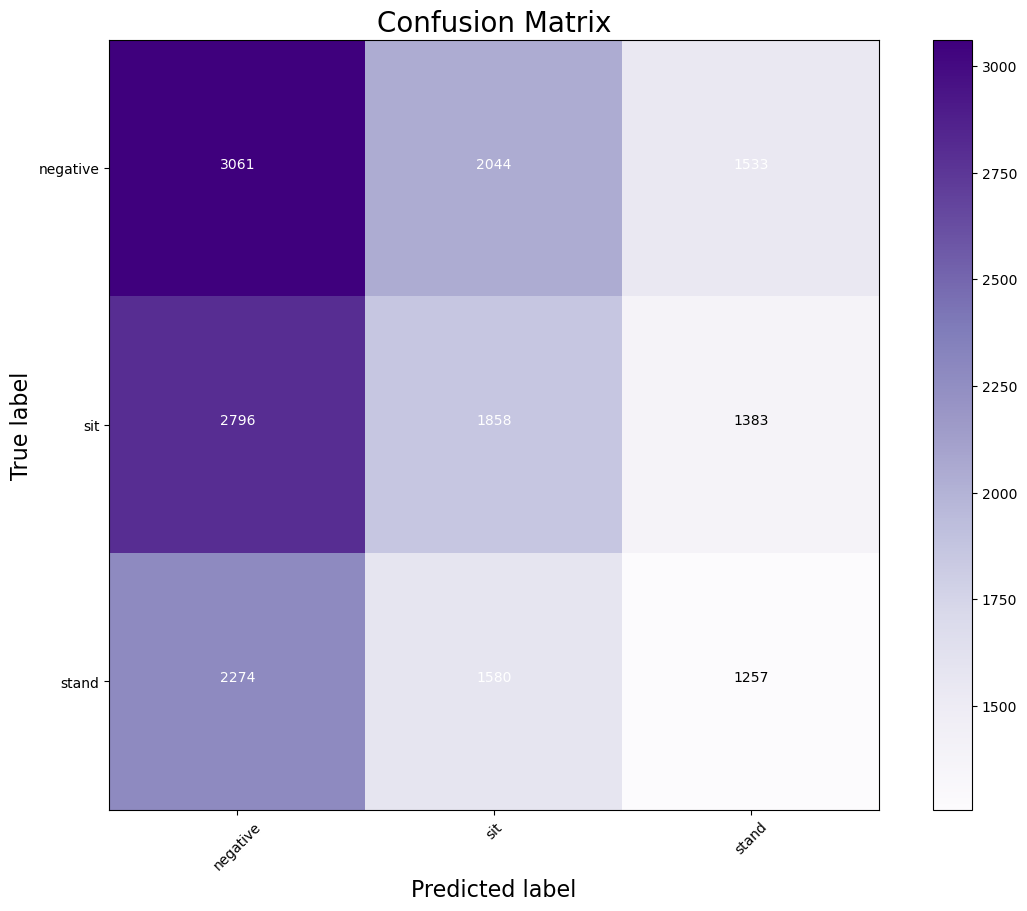

In [36]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(validation_set, batch_size = 32, verbose = 0)
plot_confusion_matrix(validation_set.classes , y_test_pred)